# Labolatorium 6
Piotr Kuchta, Sebastian Soczawa

Zadanie 1: Obliczanie całki korzystając z kwadratur prostokątów, trapezów i Simpsona.

Na początku importujemy potrzebne biblioteki

In [80]:
import numpy as np
import scipy.integrate as integrate
from math import pi as PI
from math import log
import matplotlib.pyplot as plt

Definiujemy funkcję pomocniczą zwracającą wartość badanej funkcji w punkcie.


In [81]:
def f(x):
    return 4/(1 + x*x)

Definiujemy funkcję odpowiedzialną za obliczanie wartości całki metodą prostokątów.

In [82]:
def integrate_rectangle(f, start, end, no_points):
    i = start
    output = 0.0
    interval = (end - start)/ no_points
    while i < end:
        output += interval*f(i+interval/2) if i + interval < end else (end-i)*f(i+interval/2)
        i += interval
    return output

 Dla każdej metody przygotowywujemy tablice do przechowywania błędów i wartości. Z pomocą funkcji bibliotecznych oraz własnej funkcji obliczamy odpowiednie całki.

In [83]:
y_M = np.zeros(26)
y_T = np.zeros(26)
y_S = np.zeros(26)
err_M = []
err_T = []
err_S = []
hs = []
for m in range(1, 26):
    x_space = np.linspace(0, 1, 2**m + 1)
    y_space = np.array([f(x) for x in x_space])
    hs.append( 1/(2**m+1))
    y_M[m] = integrate_rectangle(f, 0, 1, 2**m + 1)
    y_T[m] = integrate.trapz(y_space, x_space)
    y_S[m] = integrate.simps(y_space, x_space)
    print("m =", m, "M :", y_M[m], ", T : ", y_T[m], ", S : ", y_S[m])
    err_M.append(abs(PI - y_M[m])/PI)
    err_T.append(abs(PI - y_T[m])/PI)
    err_S.append(abs(PI - y_S[m])/PI)

m = 1 M : 3.150849209865603 , T :  3.1 , S :  3.1333333333333333
m = 2 M : 3.144925864003328 , T :  3.131176470588236 , S :  3.1415686274509804
m = 3 M : 3.1426214565576114 , T :  3.1389884944910893 , S :  3.1415925024587064
m = 4 M : 3.1418810041445324 , T :  3.140941612041389 , S :  3.141592651224822
m = 5 M : 3.1416691763921034 , T :  3.1414298931749745 , S :  3.141592653552836
m = 6 M : 3.14161237745565 , T :  3.1415519634856555 , S :  3.141592653589216
m = 7 M : 3.141597661301665 , T :  3.141582481063752 , S :  3.1415926535897842
m = 8 M : 3.1415939152793566 , T :  3.141590110458283 , S :  3.141592653589793
m = 9 M : 3.1415929702430603 , T :  3.1415920178069157 , S :  3.141592653589793
m = 10 M : 3.1415927329076556 , T :  3.141592494644074 , S :  3.141592653589793
m = 11 M : 3.141592673438734 , T :  3.1415926138533634 , S :  3.141592653589793
m = 12 M : 3.141592658554443 , T :  3.1415926436556862 , S :  3.141592653589793
m = 13 M : 3.1415926548312436 , T :  3.141592651106266 , S :

Dla każdej metody wypisujemy wartość błędu minimalnego oraz rysujemy wykres błędów względnych. Oraz wyznaczamy hmin.

hmin - prostokąty 3.2512336743849282e-15
hmin - trapezy 2.5444437451708133e-15
hmin - Simpson 0.0


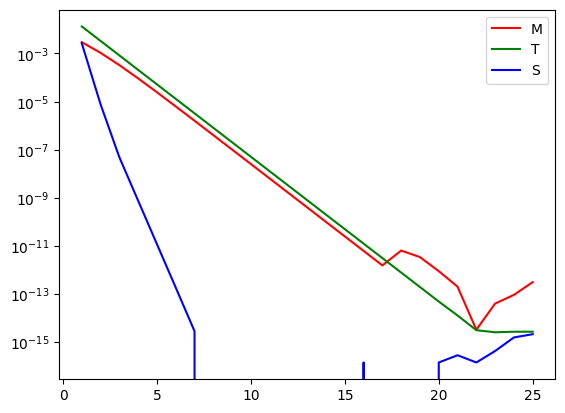

In [84]:

hmin_m = hs[0]
hmin_t = hs[0]
hmin_s = hs[0]
min_m = err_M[0]
min_t = err_T[0]
min_s = err_S[0]
for i in range(0,25):
    if min_m > err_M[i]:
        min_m = err_M[i]
        hmin_m = hs[i]
    if min_t > err_T[i]:
        min_t = err_T[i]
        hmin_t = hs[i]
    if min_s > err_S[i]:
        min_s = err_S[i]
        hmin_s = hs[i]
print("hmin - prostokąty",min_m)
print("hmin - trapezy",min_t)
print("hmin - Simpson",min_s)
m_tab = [i for i in range(1, 26)]
plt.semilogy()
plt.plot(m_tab, err_M, color='r', label="M")
plt.plot(m_tab, err_T, color='g', label="T")
plt.plot(m_tab, err_S, color='b', label="S")
plt.legend()
plt.show()

Obliczamy empiryczny błąd zbieżności.

In [85]:
th_mid = log(err_M[5]/err_M[4])/log(hs[5]/hs[4])
th_tra = log(err_T[5]/err_T[4])/log(hs[5]/hs[4])
th_sim = log(err_S[5]/err_S[4])/log(hs[5]/hs[4])
print("Rząd zbierzności empiryczny - prostokąty",th_mid)
print("Rząd zbierzności empiryczny - trapezy",th_tra)
print("Rząd zbierzności empiryczny - Simpson",th_sim)

Rząd zbierzności empiryczny - prostokąty 1.999999972915302
Rząd zbierzności empiryczny - trapezy 2.045044767147916
Rząd zbierzności empiryczny - Simpson 6.135488918417686


Jak możemy zauważyć najszybciej błąd maleje przy użyciu kwadratury Simpsona. Kwadratury prostokątów i trapezów
zbiegają do poprawnego wyniku w podobny sposób. Warto zauważyć że wartość hmin jest porównywalna do wartości wyznaczonej w laboratorium 1. Empiryczny rząd zbieżnośći nie pokrywa się z teoretycznym. Według obliczeń rząd zbierzności teoretyczny dla kwadratury prostokątów i trapezów to p = 3. U nas p = 2. Odmienna sytuacja występuje dla kwadratury Simpsona gdzie rząd zbieżnośći teoretyczny powinien wynosić p = 5. W naszym przypadku p = 6.

# Zadanie 2

In [ ]:
def legendre_poly(n, P):
    n -= 1
    return lambda x: (2*n + 1)/(n+1) * x * P[n](x) - n/(n + 1)*P[n - 1](x)

In [ ]:
# leg_polynomials = [lambda x : 1, lambda x: x]
# for i in range(2, 100):
#     leg_polynomials.append(legendre_poly(i, leg_polynomials)) 
#     # print(leg_polynomials[i](3))

# print(leg_polynomials[99](1))

In [ ]:
r = [0, 1] # range

In [ ]:
def transform_range(a, b, x):
    return ((b-a)*x + a*r[1] - b*r[0])/(r[1] - r[0])

In [ ]:
def coefficients(N, k, P):
    return -2/((N + 2)*P[N + 2](x))

[0.00036732 0.0008547  0.00134196 0.00182798 0.00231223 0.00279421
 0.00327347 0.00374954 0.00422194 0.00469021 0.0051539  0.00561256
 0.00606573 0.00651297 0.00695386 0.00738794 0.00781481 0.00823404
 0.00864523 0.00904797 0.00944187 0.00982654 0.01020162 0.01056672
 0.0109215  0.01126561 0.01159871 0.01192048 0.0122306  0.01252877
 0.0128147  0.01308811 0.01334873 0.01359631 0.0138306  0.01405138
 0.01425843 0.01445154 0.01463054 0.01479524 0.01494549 0.01508113
 0.01520204 0.01530809 0.01539919 0.01547524 0.01553617 0.01558192
 0.01561244 0.01562771 0.01562771 0.01561244 0.01558192 0.01553617
 0.01547524 0.01539919 0.01530809 0.01520204 0.01508113 0.01494549
 0.01479524 0.01463054 0.01445154 0.01425843 0.01405138 0.0138306
 0.01359631 0.01334873 0.01308811 0.0128147  0.01252877 0.0122306
 0.01192048 0.01159871 0.01126561 0.0109215  0.01056672 0.01020162
 0.00982654 0.00944187 0.00904797 0.00864523 0.00823404 0.00781481
 0.00738794 0.00695386 0.00651297 0.00606573 0.00561256 0.005153

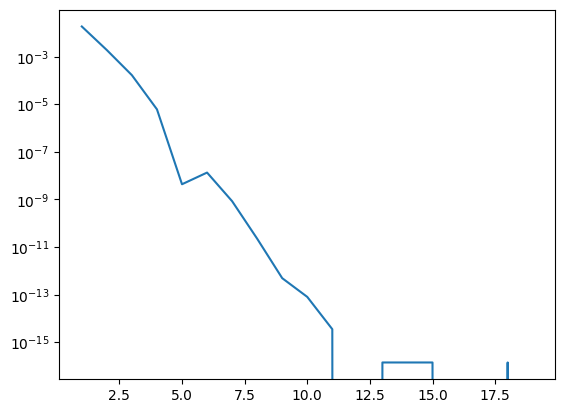

In [ ]:
import math

def gauss_legendre(f, a, b, n):
    # Calculate the nodes and weights of the Gauss-Legendre quadrature
    nodes, weights = np.polynomial.legendre.leggauss(n)
    # print(weights)
    # print(nodes)
    
    # Map the nodes and weights from the interval [-1, 1] to [a, b]
    mapped_nodes = (b - a) / 2 * nodes + (b + a) / 2
    mapped_weights = (b - a) / 2 * weights
    # print(mapped_nodes)
    print(mapped_weights)
    
    # Calculate the integral using the quadrature formula
    integral = sum(mapped_weights * f(mapped_nodes))
    
    return integral

# Define the integrand function
def f(x):
    return 1 / (x ** 2 + 1)

# Calculate the integral using Gauss-Legendre quadrature
integral = gauss_legendre(f, 0, 1, 100)

err = []
n_space = []
for n in range(1,20):
    err.append(abs(gauss_legendre(f, 0, 1, n) - PI/4)/(PI/4))
    n_space.append(n)

plt.semilogy()
plt.plot(n_space, err)
plt.show

# Print the result
print(integral)
